In [17]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
train_df = pd.read_excel("data/raw/train.xlsx")
print("Original train shape:", train_df.shape)

Original train shape: (16209, 21)


In [14]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,row_id,log_price,geo_cluster
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,1961,0,98055,47.4362,-122.187,1660,9240,0,12.501142,7
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,1992,0,98031,47.4034,-122.187,1720,3605,1,12.409018,7
2,2558690150,20140707T000000,475000,5,2.50,2510,8050,1.0,0,0,...,1977,0,98034,47.7212,-122.172,1840,8471,2,13.071072,5
3,1545806510,20140820T000000,260000,3,1.75,1340,8000,1.0,0,0,...,1980,0,98038,47.3651,-122.044,1690,8000,3,12.468441,4
4,1062100116,20150121T000000,475000,3,2.50,1640,5097,2.0,0,0,...,1969,0,98155,47.7522,-122.278,1880,6000,4,13.071072,1


In [15]:
train_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
row_id           0
log_price        0
geo_cluster      0
dtype: int64

#EDA

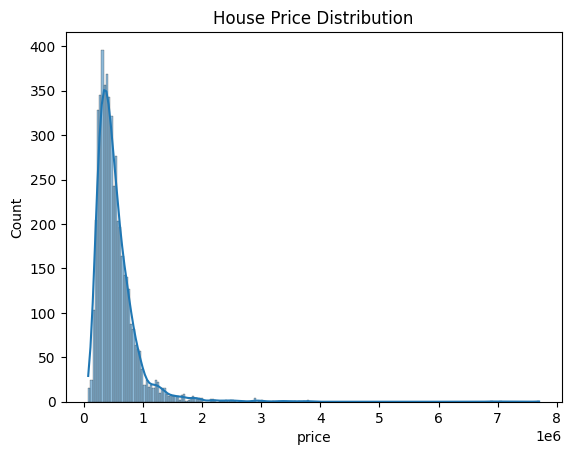

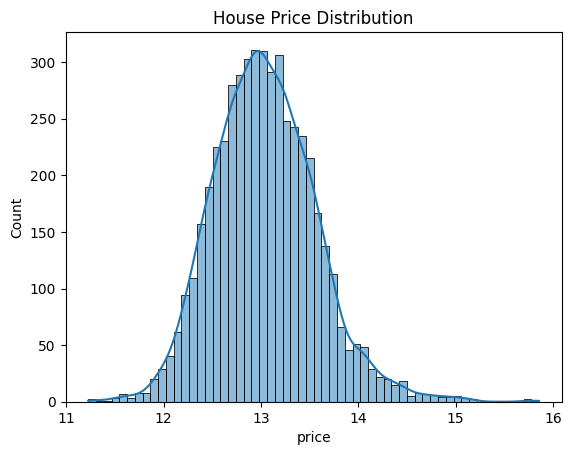

In [22]:
sns.histplot(train_df["price"], kde=True)
plt.title("House Price Distribution")
plt.show()

sns.histplot(np.log1p(train_df["price"]), kde=True)
plt.title("House Price Distribution")
plt.show()


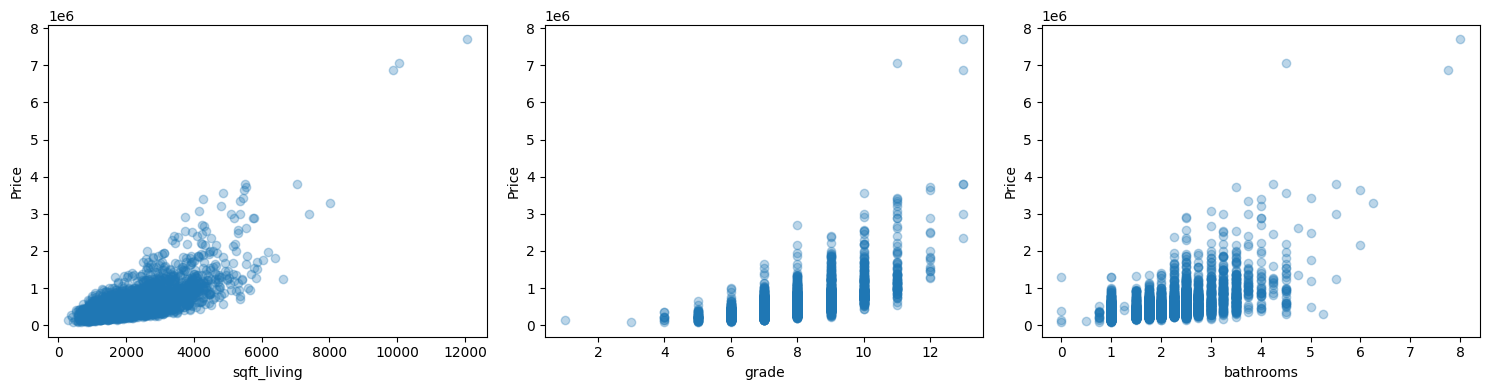

In [23]:
features = ["sqft_living", "grade", "bathrooms"]

plt.figure(figsize=(15,4))

for i, f in enumerate(features):
    plt.subplot(1,3,i+1)
    plt.scatter(train_df[f], train_df["price"], alpha=0.3)
    plt.xlabel(f)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

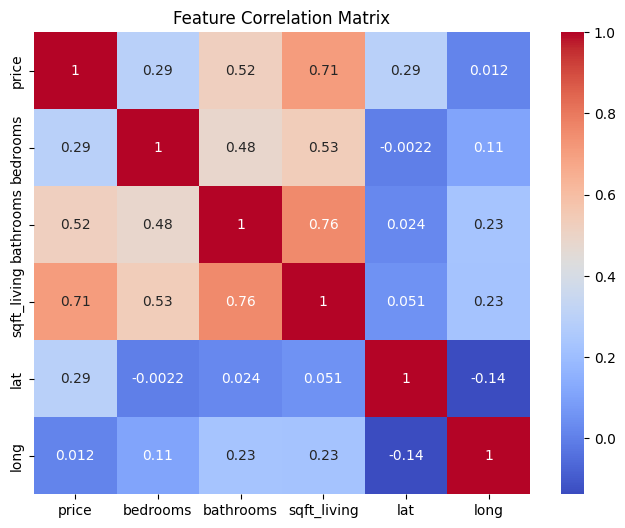

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(
    train_df[
        ["price","bedrooms","bathrooms","sqft_living","lat","long"]
    ].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()

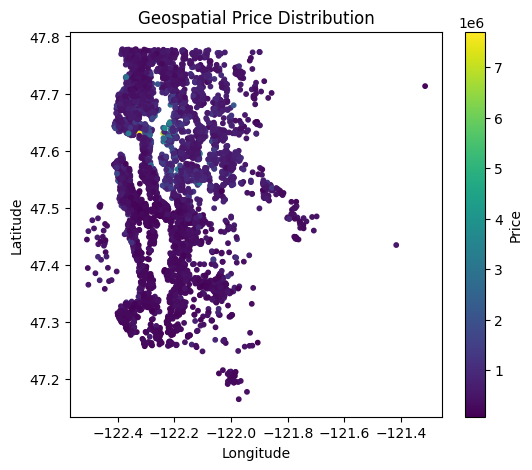

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(
    train_df.long,
    train_df.lat,
    c=train_df.price,
    cmap="viridis",
    s=10
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Price Distribution")
plt.show()

In [3]:
IMAGE_DIR = "data/images/train"

image_files = sorted([
    f for f in os.listdir(IMAGE_DIR)
    if f.endswith(".png")
])

print("Total PNG images found:", len(image_files))
print("Sample filenames:", image_files[:5])

Total PNG images found: 7737
Sample filenames: ['0.png', '1.png', '10.png', '100.png', '1000.png']


In [4]:
image_files = image_files[:5000]

In [5]:
image_indices = [int(f.replace(".png", "")) for f in image_files]

In [6]:
train_df = train_df.iloc[image_indices].reset_index(drop=True)

# NEW SAFE row index
train_df["row_id"] = train_df.index.astype(int)

print("Filtered train shape:", train_df.shape)


Filtered train shape: (5000, 22)


In [7]:
np.save("image_filenames.npy", np.array(image_files))

In [8]:
train_df["log_price"] = np.log1p(train_df["price"])

In [9]:
kmeans = KMeans(n_clusters=8, random_state=42)

train_df["geo_cluster"] = kmeans.fit_predict(
    train_df[["lat", "long"]]
)

In [10]:
tab_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "waterfront", "view", "condition", "grade",
    "sqft_above", "sqft_basement",
    "sqft_living15", "sqft_lot15",
    "lat", "long", "geo_cluster"
]

X = train_df[tab_features]
y = train_df["log_price"]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(
    X_scaled,
    y,
    train_df["row_id"],
    test_size=0.2,
    random_state=42
)

In [13]:
np.save("X_train_tab.npy", X_train)
np.save("X_val_tab.npy", X_val)
np.save("y_train.npy", y_train.values)
np.save("y_val.npy", y_val.values)

np.save("idx_train.npy", idx_train.values)
np.save("idx_val.npy", idx_val.values)